# Keras: intro image classification

In [7]:
# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# display multiple outputs within a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all";

import warnings
warnings.filterwarnings('ignore');

In [42]:
from __future__ import absolute_import, division, print_function

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.12.0


# load data: fashion mnist

In [43]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [44]:
train_images.shape
train_labels.shape
test_images.shape
test_labels.shape

(60000, 28, 28)

(60000,)

(10000, 28, 28)

(10000,)

# preprocess data

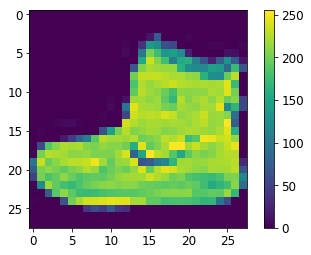

In [11]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show();

In [12]:
# standardize values between 0,1
train_images = train_images / 255.0
test_images = test_images / 255.0

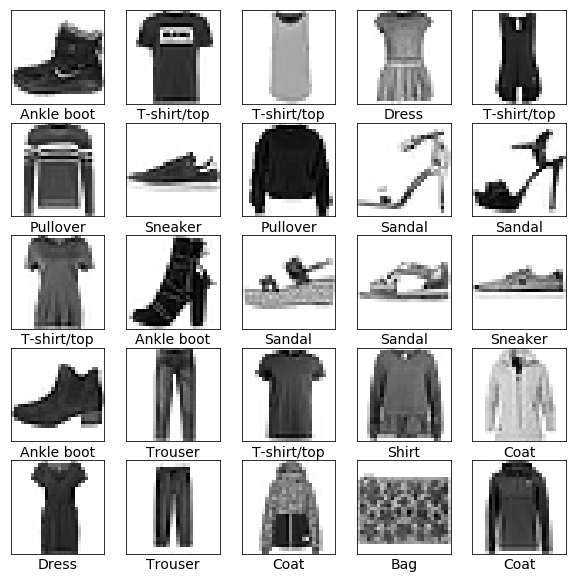

In [14]:
# plot first 25 images
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show();

# build model

In [15]:
# build the network layers
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), # converts to a 1D array
    keras.layers.Dense(128, activation=tf.nn.relu), # dense with 128 neurons
    keras.layers.Dense(10, activation=tf.nn.softmax) # class probabilities
])

In [17]:
# compile the model
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# train and evaluate the model

In [18]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 6s 92us/step - loss: 0.4984 - acc: 0.8245: 0s - loss: 0.51
Epoch 2/5
60000/60000 [==============================] - 5s 89us/step - loss: 0.3747 - acc: 0.8658
Epoch 3/5
60000/60000 [==============================] - 5s 85us/step - loss: 0.3380 - acc: 0.8754
Epoch 4/5
60000/60000 [==============================] - 6s 108us/step - loss: 0.3119 - acc: 0.8867
Epoch 5/5
60000/60000 [==============================] - 5s 83us/step - loss: 0.2935 - acc: 0.8907


In [19]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 36us/step
Test accuracy: 0.8782


In [20]:
predictions = model.predict(test_images)
predictions[0]

array([3.8297409e-07, 8.3547058e-10, 7.5578738e-10, 5.2698901e-10,
       2.7021029e-08, 3.9151902e-04, 1.6400723e-07, 1.6814334e-02,
       1.4110883e-07, 9.8279345e-01], dtype=float32)

In [21]:
np.argmax(predictions[0])

9

In [22]:
test_labels[0]

9

In [30]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color);

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue');

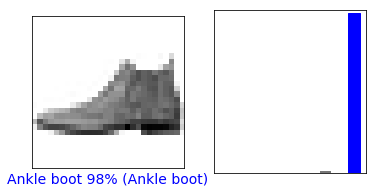

In [31]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels);

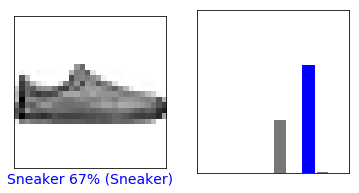

In [32]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels);

<Figure size 1440x720 with 0 Axes>

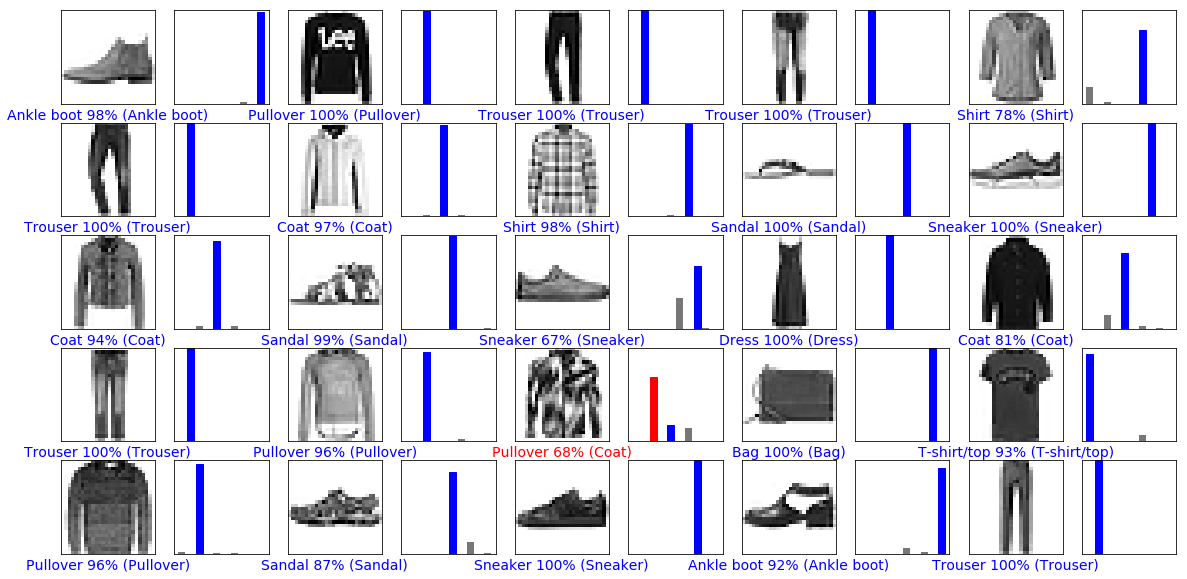

In [35]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows));
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1);
  plot_image(i, predictions, test_labels, test_images);
  plt.subplot(num_rows, 2*num_cols, 2*i+2);
  plot_value_array(i, predictions, test_labels);